# Lecture 09의 데모

### Lecture 09의 데모에 대한 코드

참고자료: 

https://github.com/data-8/materials-sp22/blob/main/lec/lec13.ipynb

https://github.com/data-8/materials-sp22/blob/main/lec/lec14.ipynb

In [1]:
import os
from google.colab import drive

drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/ITEC419-fa22/lec

Mounted at /content/gdrive
/content/gdrive/MyDrive/ITEC419-fa22/lec


In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

## **Comparison** ##

## **Comparisons with arrays**

In [3]:
s = make_array('John', 'John', 'Jack', 'John')
s

array(['John', 'John', 'Jack', 'John'],
      dtype='<U4')

In [4]:
s=='John'

array([ True,  True, False,  True], dtype=bool)

In [8]:
sum(s=='John')

3

In [7]:
sum(s!='John')

1

In [10]:
a=(s=='John')# 가독성 높이기 위해 괄호 넣어줌
a

array([ True,  True, False,  True], dtype=bool)

In [11]:
a.item(1)#2번째꺼

True

In [12]:
type(2)

int

In [13]:
tips = Table.read_table('tips.csv')
tips.show(3)

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3


In [14]:
tips.where('size',are.above(2))# size가 2보다 큰

total_bill,tip,sex,smoker,day,time,size
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
26.88,3.12,Male,No,Sun,Dinner,4
35.26,5,Female,No,Sun,Dinner,4
18.43,3,Male,No,Sun,Dinner,4
10.33,1.67,Female,No,Sun,Dinner,3
16.29,3.71,Male,No,Sun,Dinner,3
16.97,3.5,Female,No,Sun,Dinner,3


In [15]:
tips.where('size',are.above(2)).num_rows

84

In [16]:
sum(tips.column('size')>2)

84

In [17]:
# maple_syrup==3 -> define 되어 있지 않으므로 에러
maple_syrup='bad dog'


In [19]:
maple_syrup=='good dog'

True

In [20]:
1+2+3==4+2

True

In [ ]:
#1+2+3=4+2 => error (잘못된 operator)

In [21]:
np.count_nonzero(s=='John')

3

In [25]:
x=np.arange(20,31)# 배열 만들어짐

In [23]:
x>28

array([False, False, False, False, False, False, False, False, False,
        True,  True], dtype=bool)

In [27]:
sum(x>28)# 결과: 두개가 28보다 크다

2

## **Rows & Apply**

In [28]:
tips.show(3)

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3


In [29]:
r=tips.row(0)
r

Row(total_bill=16.989999999999998, tip=1.01, sex='Female', smoker='No', day='Sun', time='Dinner', size=2)

In [30]:
r.item(0)#0보다는 레이블을 직접 쓰는게 더 좋음. 

16.989999999999998

In [32]:
r.item('total_bill')#label이라서 이렇게 해도 똑같이 나옴

16.989999999999998

In [33]:
r.item('smoker')

'No'

In [35]:
tips.select(0,1,6)#0번째 column, 1번쨰 column, 6번째 column들을 뽑아서 제출해줌

total_bill,tip,size
16.99,1.01,2
10.34,1.66,3
21.01,3.5,3
23.68,3.31,2
24.59,3.61,4
25.29,4.71,4
8.77,2,2
26.88,3.12,4
15.04,1.96,2
14.78,3.23,2


In [37]:
tips.select(0,1,6).row(1)

Row(total_bill=10.34, tip=1.6599999999999999, size=3)

In [40]:
r1 = tips.select(0,1,6).row(1)

In [39]:
tips.pivot(4,5)

time,Fri,Sat,Sun,Thur
Dinner,12,87,76,1
Lunch,7,0,0,61


In [41]:
p=tips.pivot(4,5)
sum(p.drop(0).row(1))

68

In [44]:
p.drop(0).apply(sum)#p.drop 이 테이블임. 여기에 sum을 하니까 두개의 항이 나옴(apply는 각각 행에 대해서 적용 시키는 것)

array([176,  68])

In [46]:
p.with_column('Total',p.drop(0).apply(sum))

time,Fri,Sat,Sun,Thur,Total
Dinner,12,87,76,1,176
Lunch,7,0,0,61,68


In [47]:
p.drop(0).row(0)

Row(Fri=12, Sat=87, Sun=76, Thur=1)

In [49]:
make_array(12,87,76,1)#배열이 만들어짐

array([12, 87, 76,  1])

In [50]:
make_array(12,87,76,1)+3

array([15, 90, 79,  4])

In [ ]:
# p.drop(0).row(0)+3 -> 이건 안됨. tuple 

In [51]:
np.array(p.drop(0).row(0)) + 3 #

array([15, 90, 79,  4])

In [52]:
p

time,Fri,Sat,Sun,Thur
Dinner,12,87,76,1
Lunch,7,0,0,61


In [ ]:
p.exclude

In [53]:
tips.show(2)

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3


In [55]:
def f(n):
  return n>2

tips.apply(f,'size')

array([False,  True,  True, False,  True,  True, False,  True, False,
       False, False,  True, False,  True, False, False,  True,  True,
        True,  True, False, False, False,  True, False,  True, False,
       False, False, False, False,  True, False,  True, False,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False, False,  True,  True, False, False, False,  True, False,
        True, False,  True, False, False,  True, False, False, False,
        True,  True,  True, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False,  True,
       False, False,  True, False, False, False, False, False,  True,
       False, False,

In [56]:
def g(r):
  return sum(r)>2
p.drop(0).apply(g)# 각각의 row에 다 적용시킴


array([ True,  True], dtype=bool)

## **Conditional Statements**

In [57]:
x=20
s='You are 20'

In [58]:
if x>=18:
  s='You are legally vote'
s

'You are legally vote'

In [59]:
if x>=21:
  s='You are legally drink'
s

'You are legally vote'

In [60]:
x=25

In [61]:
def age(x):
  if x>=18:
    return 'You are legally vote.'
  if(x>=21):
    return 'You are legally drink.'

In [62]:
age(3)

In [63]:
age(20)

'You are legally vote.'

In [64]:
age(25)

'You are legally vote.'

In [65]:
def age(x):
    if x >= 21:# 항상제약이 있는 것을 가장 위쪽에 있도록하기(아래까지 안내려오고 끝날 수 있음. ㅜㅜ)
        return 'You can legally vote and drink.'
    elif x >= 18: 
        return 'You can legally vote.'
    else: 
        return 'You can legally drink milk.'

In [66]:
trip = Table().read_table('trip.csv')
trip.show(3)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107


In [70]:
def trip_kind(start, end):
    if start == end:
        return 'round trip'# 돌아갔다가 다시 반납했으니까 round trip이고,,,
    else:
        return 'one way'

kinds = trip.with_column('Trip Kind', trip.apply(trip_kind, 'Start Station', 'End Station'))
kinds.show(3)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code,Trip Kind
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139,one way
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032,one way
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107,one way


In [69]:
kinds.where('Duration', are.below(600)).pivot('Trip Kind', 'Start Station')#duration이 얼마 이상 되는 것만 뽑아서 피봇을 만듬. # trip kind 를 col/ 뒤에거를 row로 해서 만든 것.(표를 이렇게 줬을때 코드를 만들 수 있어야 함.)

Start Station,one way,round trip
2nd at Folsom,6821,25
2nd at South Park,6484,98
2nd at Townsend,9513,83
5th at Howard,5752,36
Adobe on Almaden,439,8
Arena Green / SAP Center,382,18
Beale at Market,5750,32
Broadway St at Battery St,4482,59
California Ave Caltrain Station,39,12
Castro Street and El Camino Real,1005,10


## **Simulation**

Let's play a game: we each roll a die. 

If my number is bigger: you pay me a dollar.

If they're the same: we do nothing.

If your number is bigger: I pay you a dollar.

Steps:
1. Find a way to simulate two dice rolls.
2. Compute how much money we win/lose based on the result.
3. Do steps 1 and 2 10,000 times.

### Conditional Statements

In [71]:
# A start (work in progress)
def one_round(my_roll, your_roll):
    if my_roll > your_roll:
        return 1

In [72]:
one_round(4,3)

1

In [73]:
one_round(2,6)

In [74]:
# Final correct version
def one_round(my_roll, your_roll):
    if my_roll>your_roll:
      return 1
    elif my_roll==your_roll:
      return 0
    else:
      return -1

In [75]:
one_round(1,1)

0

In [76]:
one_round(7,-1)

1

### **Random Selection**

In [77]:
mornings = make_array('wake up', 'sleep in')
mornings

array(['wake up', 'sleep in'],
      dtype='<U8')

In [78]:
np.random.choice(mornings)

'sleep in'

We can also pass an argument that specifies how many times to make a random choice:

In [81]:
 s=np.random.choice(mornings,7)

In [82]:
s=='wake up'

array([False, False, False,  True,  True,  True, False], dtype=bool)

### **Simulating the roll of a die**

In [83]:
dice_faces=np.arange(1,7)
dice_faces

array([1, 2, 3, 4, 5, 6])

In [84]:
np.random.choice(dice_faces)

5

In [87]:
def simulate_one_round():
    my_roll = np.random.choice(dice_faces)
    your_roll = np.random.choice(dice_faces)
    return one_round(my_roll, your_roll)

In [88]:
simulate_one_round()

-1

### **Appending Arrays**

### **Repeated Betting**

## **`For` Statements**

### **Simulating heads in 100 coin tosses**

In [ ]:
# Simulate one outcome


In [ ]:
# Decide how many times you want to repeat the experiment


In [ ]:
# Simulate that many outcomes


### **Chance of At Least One Success in Independently Repeated Success/Failure Trials**

In [ ]:
# Chance of no sixes in 4 rolls of a die


In [ ]:
# Chance of at least one six in 4 rolls of a die


In [ ]:
# Chance of at least one six in n rolls of a die


## **The Monty Hall Problem**

In [ ]:
goats = make_array('first goat', 'second goat')
goats

array(['first goat', 'second goat'],
      dtype='<U11')

In [ ]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [ ]:
[other_goat('first goat'), other_goat('second goat')]

['second goat', 'first goat']

In [ ]:
hidden_behind_doors = np.append(goats, 'car')
hidden_behind_doors

array(['first goat', 'second goat', 'car'],
      dtype='<U11')

In [ ]:
def monty_hall_game():
    """Return 
    [contestant's guess, what Monty reveals, what remains behind the other door]"""
    
    contestant_guess = np.random.choice(hidden_behind_doors)
    
    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']
    
    if contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']
    
    if contestant_guess == 'car':
        revealed = np.random.choice(goats)
        return [contestant_guess, revealed, other_goat(revealed)]

In [ ]:
monty_hall_game()

['car', 'second goat', 'first goat']

In [ ]:
games = Table(['Guess', 'Revealed', 'Remaining'])

for i in np.arange(10000):
    games.append(monty_hall_game())

In [ ]:
games.show(3)

Guess,Revealed,Remaining
second goat,first goat,car
second goat,first goat,car
second goat,first goat,car


In [ ]:
original_choice = games.group('Guess')
original_choice

Guess,count
car,3293
first goat,3393
second goat,3314


In [ ]:
remaining_door = games.group('Remaining')
remaining_door

Remaining,count
car,6707
first goat,1646
second goat,1647


In [ ]:
joined = original_choice.join('Guess', remaining_door, 'Remaining')
combined = joined.relabeled(0, 'Item').relabeled(1, 'Original Door').relabeled(2, 'Remaining Door')
combined

Item,Original Door,Remaining Door
car,3293,6707
first goat,3393,1646
second goat,3314,1647


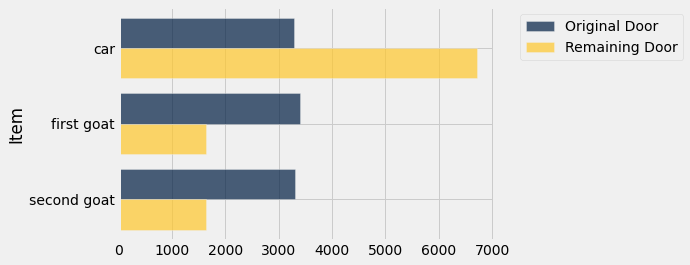

In [ ]:
combined.barh(0)